<a href="https://colab.research.google.com/github/nivedha75/Columbia-Summer-Coursework/blob/master/Copy_of_ClassificationModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load our data

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

df_iris = pd.read_csv('/content/gdrive/My Drive/iris.csv')
df_titanic = pd.read_csv('/content/gdrive/My Drive/titanic (1).csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 2. Some Quick EDA

```
df_iris.head()
```

In [ ]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

```
import seaborn as sns
sns.boxplot(x='Species', y="SepalLengthCm", data=df_iris)
```

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


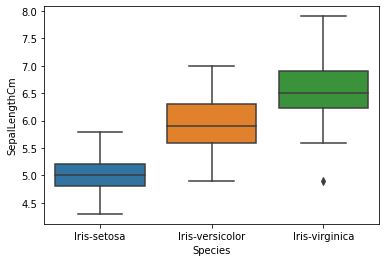

In [ ]:
import seaborn as sns
sns.boxplot(x='Species', y="SepalLengthCm", data=df_iris)

```
sns.boxplot(x='Species', y="SepalWidthCm", data=df_iris)
```

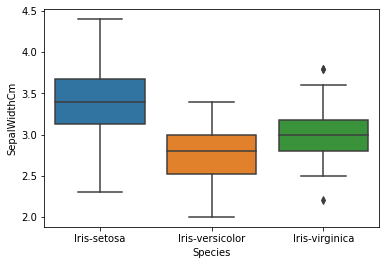

In [ ]:
sns.boxplot(x='Species', y="SepalWidthCm", data=df_iris)

```
sns.boxplot(x='Species', y="PetalLengthCm", data=df_iris)
```

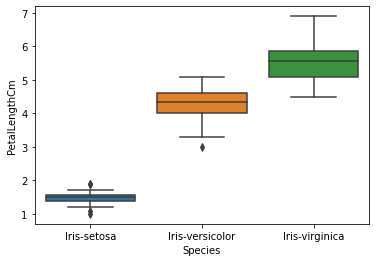

In [ ]:
#no overlap for setosa species so very great feature to distinguish species
sns.boxplot(x='Species', y="PetalLengthCm", data=df_iris)

```
sns.boxplot(x='Species', y="PetalWidthCm", data=df_iris)
```

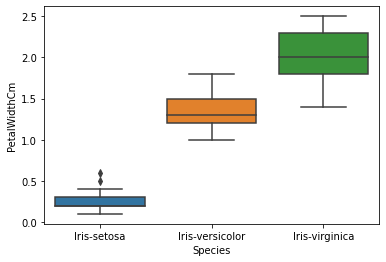

In [ ]:
sns.boxplot(x='Species', y="PetalWidthCm", data=df_iris)


```
df_titanic.head()
```

In [ ]:
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


```
sns.boxplot(x='Survived', y="Age", data=df_titanic)
```

In [ ]:
df_titanic.Survived.value_counts()

0    545
1    342
Name: Survived, dtype: int64

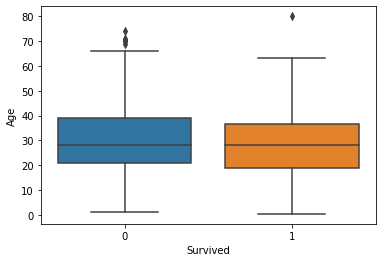

In [ ]:
sns.boxplot(x='Survived', y="Age", data=df_titanic)

```
df_titanic['familysize'] = df_titanic['Siblings/Spouses Aboard'] + df_titanic['Parents/Children Aboard'] + 1
```

In [ ]:
df_titanic['familysize'] = df_titanic['Siblings/Spouses Aboard'] + df_titanic['Parents/Children Aboard'] + 1

```
sns.boxplot(x='Survived', y="familysize", data=df_titanic)
```



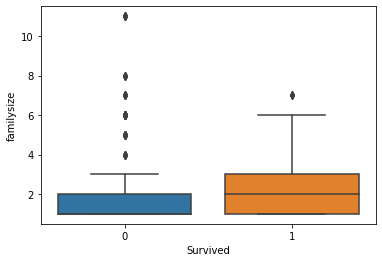

In [ ]:
sns.boxplot(x='Survived', y="familysize", data=df_titanic)
#no median shown

```
df_titanic['alone'] = 0
df_titanic.loc[df_titanic['familysize'] == 1,'alone'] = 1

pd.crosstab(df_titanic.Survived, df_titanic.alone).apply(lambda r: r/r.sum(), axis=1)
```

In [ ]:
df_titanic['alone'] = 0
df_titanic.loc[df_titanic['familysize'] == 1,'alone'] = 1
 
pd.crosstab(df_titanic.Survived, df_titanic.alone).apply(lambda r: r/r.sum(), axis=1)

alone,0,1
Survived,,
0,0.321101,0.678899
1,0.523392,0.476608


## 3. Standardize the data

```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df_iris[['SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm']])


df_scaled = pd.DataFrame(data=scaled, columns=['SepalLengthCm_scaled',
 'SepalWidthCm_scaled',
 'PetalLengthCm_scaled',
 'PetalWidthCm_scaled'])

df_iris = df_iris.join(df_scaled)

```

In [ ]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaled = scaler.fit_transform(df_iris[['SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm']])
 
 
df_scaled = pd.DataFrame(data=scaled, columns=['SepalLengthCm_scaled',
 'SepalWidthCm_scaled',
 'PetalLengthCm_scaled',
 'PetalWidthCm_scaled'])
 
df_iris = df_iris.join(df_scaled)

```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df_titanic[['Fare','Age','familysize']])


df_scaled = pd.DataFrame(data=scaled, columns=['Fare_scaled',
 'Age_scaled','familysize_scaled'])

df_titanic = df_titanic.join(df_scaled)
```

In [ ]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaled = scaler.fit_transform(df_titanic[['Fare','Age','familysize']])
 
 
df_scaled = pd.DataFrame(data=scaled, columns=['Fare_scaled',
 'Age_scaled','familysize_scaled'])
 
df_titanic = df_titanic.join(df_scaled)

ValueError: ignored

## 4. Run the model


```
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)

X = df_iris[['PetalLengthCm_scaled']]
y = df_iris['Species']

KNN.fit(X, y)

df_iris['prediction'] = KNN.predict(X)
df_iris[['Species','prediction']].sample(20)

```

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
KNN = KNeighborsClassifier(n_neighbors=5)
 
X = df_iris[['PetalLengthCm_scaled']]
y = df_iris['Species']
 
KNN.fit(X, y)
 
df_iris['prediction'] = KNN.predict(X)
df_iris[['Species','prediction']].sample(20)
 

,Species,prediction
13,Iris-setosa,Iris-setosa
9,Iris-setosa,Iris-setosa
50,Iris-versicolor,Iris-versicolor
133,Iris-virginica,Iris-virginica
81,Iris-versicolor,Iris-versicolor
92,Iris-versicolor,Iris-versicolor
60,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor
24,Iris-setosa,Iris-setosa
116,Iris-virginica,Iris-virginica



```
from sklearn.linear_model import LogisticRegression

LogR = LogisticRegression()

X = df_titanic[['Fare_scaled','Age_scaled','familysize_scaled']]
y = df_titanic['Survived']

LogR.fit(X, y)

df_titanic['prediction'] = LogR.predict(X)
df_titanic[['Survived','prediction']].sample(20)
```



In [ ]:
from sklearn.linear_model import LogisticRegression
 
LogR = LogisticRegression()
 
X = df_titanic[['Fare_scaled','Age_scaled','familysize_scaled']]
y = df_titanic['Survived']
 
LogR.fit(X, y)
 
df_titanic['prediction'] = LogR.predict(X)
df_titanic[['Survived','prediction']].sample(20)

,Survived,prediction
697,1,1
763,0,0
85,0,0
590,0,0
261,0,0
793,1,0
514,0,0
721,0,0
517,1,1
841,0,0


## 5. Check the performance


### **Accuracy**

(All Correctly Identified)/(All)

Use only when your classes have very similar sizes.

![alt text](https://miro.medium.com/max/700/1*OhEnS-T54Cz0YSTl_c3Dwg.jpeg)

### **Precision**

 TP/(TP+FP) = TP/(All Predicted Positive)

You use Precision when the cost of a False Positive is high. Example: detecting spam emails.

### **Recall**

TP/(TP+FN) = TP / (All Actual Positive)

You use Recall when the cost of a False Negative is high. Example: detecting cancer or other disease.


### **F1 score**

(2 x Precision x Recall)/(Precision+Recall)

You use the F1 score when you want to balance  precision and recall. 


```
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(df_iris['Species'],df_iris['prediction']))
print(recall_score(df_iris['Species'],df_iris['prediction'],average='macro'))
print(precision_score(df_iris['Species'],df_iris['prediction'],average='macro'))
print(f1_score(df_iris['Species'],df_iris['prediction'],average='macro'))
```

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
print(accuracy_score(df_iris['Species'],df_iris['prediction']))
print(recall_score(df_iris['Species'],df_iris['prediction'],average='macro'))
print(precision_score(df_iris['Species'],df_iris['prediction'],average='macro'))
print(f1_score(df_iris['Species'],df_iris['prediction'],average='macro'))

0.9533333333333334
0.9533333333333333
0.9534480458850206
0.9533286661999534


```
print(accuracy_score(df_titanic['Survived'],df_titanic['prediction']))
print(recall_score(df_titanic['Survived'],df_titanic['prediction'],average='macro'))
print(precision_score(df_titanic['Survived'],df_titanic['prediction'],average='macro'))
print(f1_score(df_titanic['Survived'],df_titanic['prediction'],average='macro'))
```

In [ ]:
print(accuracy_score(df_titanic['Survived'],df_titanic['prediction']))
print(recall_score(df_titanic['Survived'],df_titanic['prediction'],average='macro'))
print(precision_score(df_titanic['Survived'],df_titanic['prediction'],average='macro'))
print(f1_score(df_titanic['Survived'],df_titanic['prediction'],average='macro'))

0.6696730552423901
0.5890632544664414
0.6898024284832269
0.5669529863616293


## 6. Repeat

1. Change the number of neighbors in the KNN model to see if you can improve the performance.

2. Engineer and add additional features to the Logistic Regression model to see if you can improve the performance.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
KNN = KNeighborsClassifier(n_neighbors=5)
 
X = df_iris[['PetalLengthCm_scaled', 'PetalWidthCm_scaled']]
y = df_iris['Species']
 
KNN.fit(X, y)
 
df_iris['prediction'] = KNN.predict(X)
df_iris[['Species','prediction']].sample(20)

,Species,prediction
121,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
58,Iris-versicolor,Iris-versicolor
107,Iris-virginica,Iris-virginica
146,Iris-virginica,Iris-virginica
50,Iris-versicolor,Iris-versicolor
12,Iris-setosa,Iris-setosa
55,Iris-versicolor,Iris-versicolor
115,Iris-virginica,Iris-virginica
75,Iris-versicolor,Iris-versicolor


In [ ]:
print(accuracy_score(df_iris['Species'],df_iris['prediction']))
print(recall_score(df_iris['Species'],df_iris['prediction'],average='macro'))
print(precision_score(df_iris['Species'],df_iris['prediction'],average='macro'))
print(f1_score(df_iris['Species'],df_iris['prediction'],average='macro'))

0.9733333333333334
0.9733333333333333
0.9733333333333333
0.9733333333333333


### Challenge

- Create a binary variable from the Boston Housing dataset called medv_binary where a value of 1 indicates median home value is greater than or equal to 22 and 0 otherwise.
- Create a 3 feature model using KNN and Logistic Regression to predict medv_binary.
- Choose a performance measure and explain your intuition behind choosing that measure.
- Test out different KNN models with different values of k and choose the best model between KNN and Logistic Regression. 